## tarea 4.1

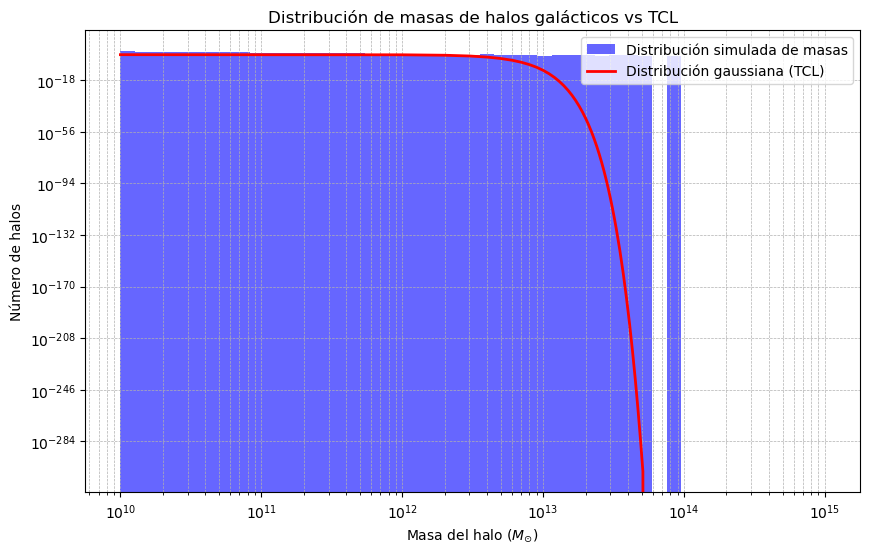

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros para la simulación
np.random.seed(42)
N_halos = 10000  # Número de halos simulados
masa_min = 1e10  # Masa mínima de los halos (en masas solares)
masa_max = 1e15  # Masa máxima de los halos (en masas solares)
alpha = -1.9     # Exponente de la ley de potencias

# Función para generar una distribución de ley de potencias
def power_law_distribution(N, masa_min, masa_max, alpha):
    return (np.random.uniform(0, 1, N) * (masa_max**(alpha+1) - masa_min**(alpha+1)) + masa_min**(alpha+1))**(1/(alpha+1))

# Generar las masas de los halos
masas = power_law_distribution(N_halos, masa_min, masa_max, alpha)

# Histograma y cálculo de la distribución Gaussiana esperada (TCL)
bins = np.logspace(np.log10(masa_min), np.log10(masa_max), 50)
hist, bin_edges = np.histogram(masas, bins=bins)
mean_masa = np.mean(masas)
std_masa = np.std(masas)

# Crear la distribución gaussiana esperada
x_gauss = np.linspace(masa_min, masa_max, 1000)
gaussiana = norm.pdf(x_gauss, mean_masa, std_masa) * N_halos * np.diff(bin_edges)[0]

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.hist(masas, bins=bins, alpha=0.6, label="Distribución simulada de masas", color='blue')
plt.plot(x_gauss, gaussiana, label="Distribución gaussiana (TCL)", color='red', lw=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Masa del halo ($M_{\odot}$)")
plt.ylabel("Número de halos")
plt.title("Distribución de masas de halos galácticos vs TCL")
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


# la grafica muestra la distribucion simulada de las masas
#de halos galacticos frente a una distribucion
#gaussiana esperada 
# la distribucion gaussiana que sirge del TCL 
#no ajusta bien las masas grandes # este exceso en las masas grandes 
# podria ser indicado de la discrepancia observada en los datos reales
# sugiere quue el modelo cosmico subyacente podria necesitar ajustes

# Nota: 50
Para los halos muy masivos se dice en el enunciado que hay pocos. Por ese motivo es sospechoso el uso de un error gaussiano. Si fue motivado solamente por el teorema central del límite puede no aplicarse a este caso, sobre todo en las colas. En ese caso la conclusión de que es necesario revisar el modelo cosmológico es apresurada.